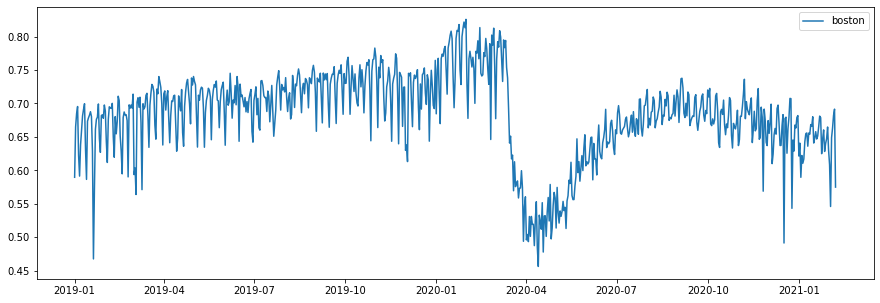

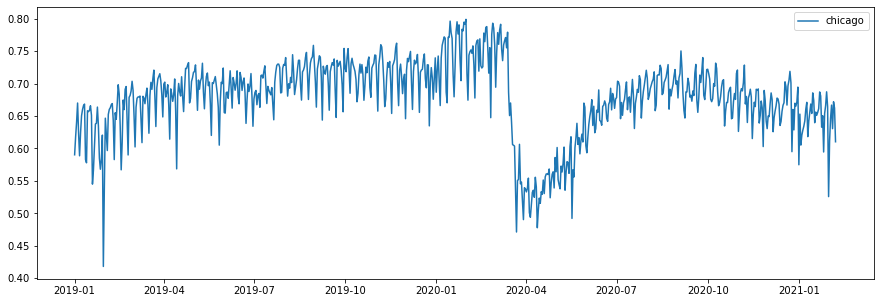

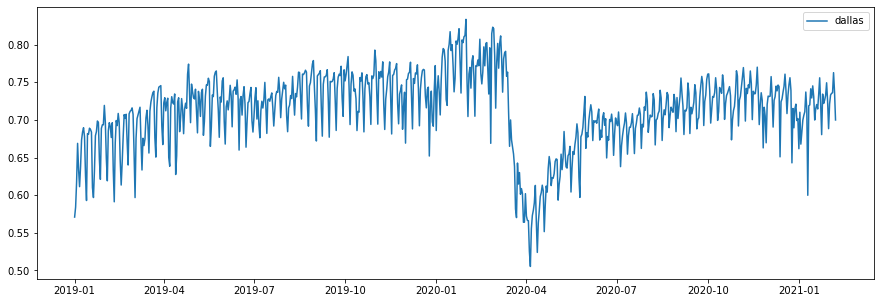

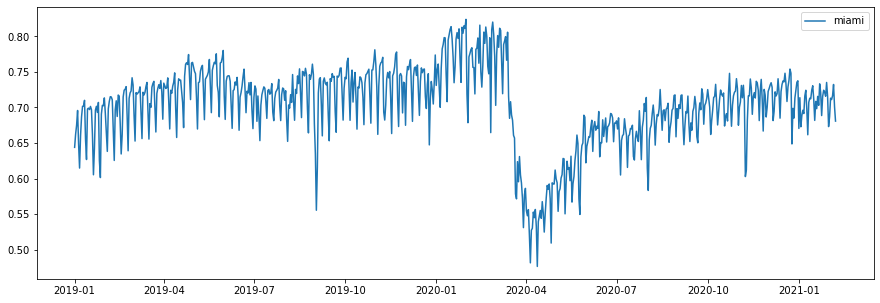

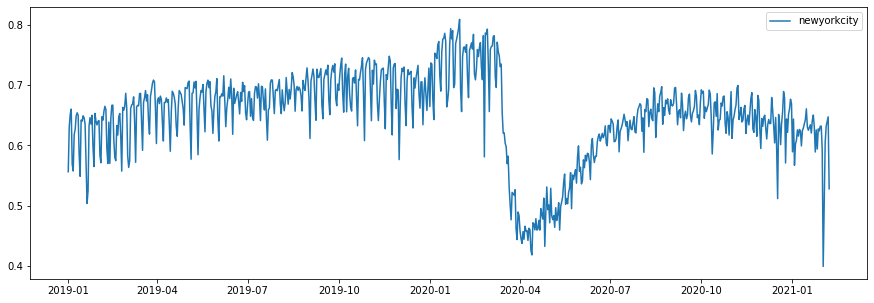

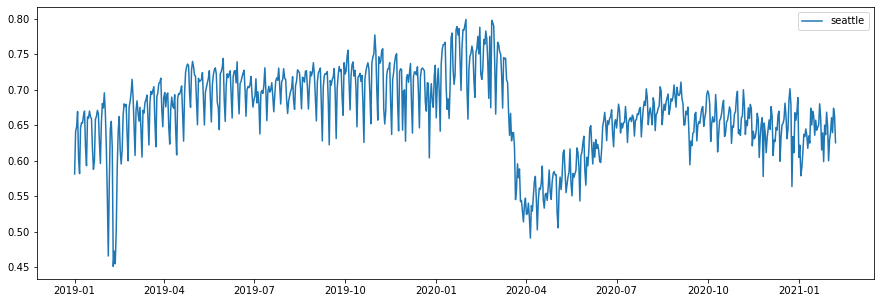

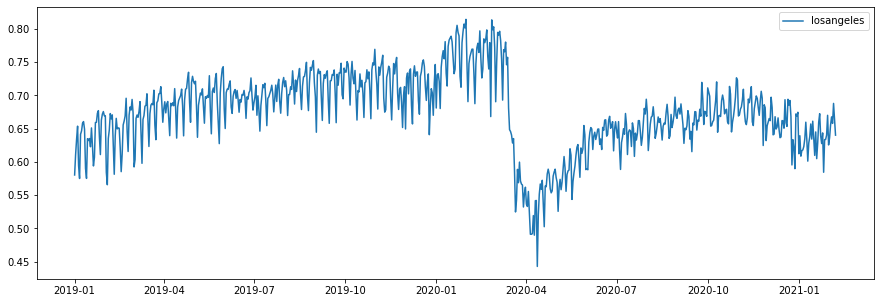

In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

filepath = '/home/arrow/safegraph/mobilityplot/'
cities = ['boston', 'chicago', 'dallas', 'miami', 'newyorkcity', 'seattle', 'losangeles']
months = [
    '201901', '201902', '201903', '201904', '201905', '201906', '201907', '201908', '201909', '201910', '201911', '201912',
    '202001', '202002', '202003', '202004', '202005', '202006', '202007', '202008', '202009', '202010', '202011', '202012',
    '202101', '202102']

# print('Date:', date_time_obj.date())

for city in cities:
    city_raw = {'0_date':[], city:[], 'formaldate':[]}
    city_df = pd.DataFrame(data=city_raw)

    for mth in months:
        datafile = filepath + city + mth + '.csv'
        df = pd.read_csv(datafile, header=0, sep=',')
        formaldate = []

        for i in range(df.shape[0]):
            # print(df.iloc[i][0])
            date_time_obj = datetime.datetime.strptime(df.iloc[i][0], '%Y-%m-%d')
            formaldate.append(date_time_obj)

        df['formaldate'] = formaldate
        city_df = city_df.append(df, ignore_index=True)
    csvpath = filepath + city + '.csv'
    rank_city_df = city_df.sort_values(by=['formaldate'])
    rank_city_df.to_csv(csvpath, index=False) 

    plt.figure(figsize=(15,5))
    plt.plot(rank_city_df['formaldate'], rank_city_df[city], label=city)
    plt.legend(loc='best')
    plt.show()